In [111]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing # preprossing is what we do with the data before we run the learning algorithm
from sklearn.linear_model import LogisticRegression # importing Sklearn's logistic regression's module
from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score 
import pandas as pd
from itertools import combinations

In [120]:
df=pd.read_csv("dataset.csv",low_memory=False)

In [113]:
df

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,emtion
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,0
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,0
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,0
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,0
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,0
...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,5
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,5
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,5
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,5


In [114]:
target_dict=df.iloc[:,-1].value_counts()

Text(0.5, 1.0, 'Target variable distribution')

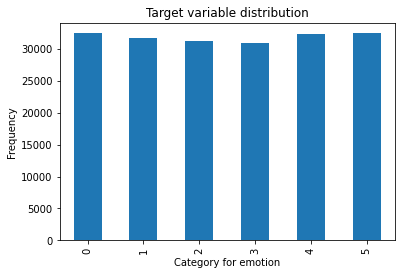

In [115]:
ax=target_dict.sort_index().plot(kind="bar")
ax.set_ylabel("Frequency")
ax.set_xlabel("Category for emotion")
ax.set_title("Target variable distribution")

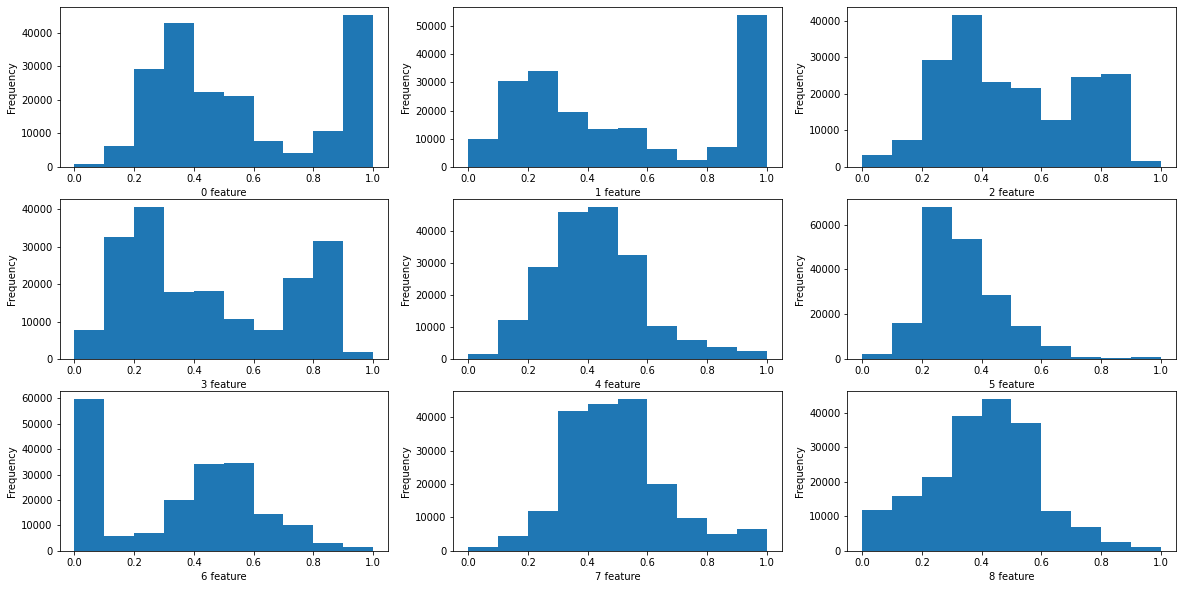

In [116]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
for index in range(0,9):
    tmp=df.iloc[:,index].plot(ax=ax[index//3,index%3],kind="hist")
    tmp.set_xlabel(str(index)+" feature" )

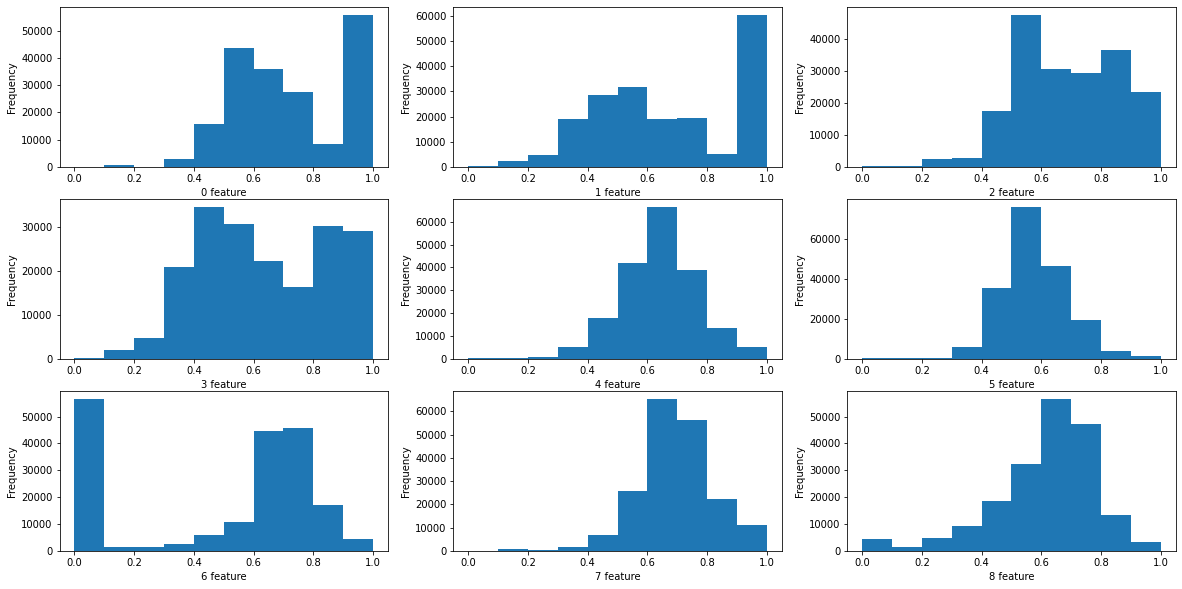

In [117]:
fig,ax=plt.subplots(3,3,figsize=(20,10))
for index in range(0,9):
    tmp=np.sqrt(df.iloc[:,index]).plot(ax=ax[index//3,index%3],kind="hist")
    tmp.set_xlabel(str(index)+" feature" )

In [38]:
new_X=df.iloc[:,:-1]
"""
new_X["left_eye"]=df["e1"]*df["e2"]
new_X["right_eye"]=df["e3"]*df["e4"]
new_X["mouth1"]=df["m1"]*df["m2"]
new_X["mouth2"]=df["m3"]*df["m4"]
new_X["mouth3"]=df["m6"]*df["m7"]

new_X["left_eye_1"]=df["e1"]+df["e2"]
new_X["right_eye_1"]=df["e3"]+df["e4"]
new_X["mouth1_1"]=df["m1"]+df["m2"]
new_X["mouth2_1"]=df["m3"]+df["m4"]
new_X["mouth3_1"]=df["m6"]+df["m7"]
new_X["eye"]=df["e1"]+df["e2"]+df["e3"]+df["e4"]
new_X["mouth"]=df["m1"]+df["m2"]+df["m3"]+df["m4"]+df["m6"]+df["m7"]
"""
for index in range(len(df.columns)):
    if(index==len(df.columns)-1):
        continue
    element=df.columns[index]
    #new_X["sqrt"+str(element)]=np.sqrt(df[element])
    for ind in range(index+1,len(df.columns)):
        if(ind==len(df.columns)-1):
            continue
        ele=df.columns[ind]
        new_X[str(ele)+str(element)]=df[element]*df[ele]
new_X

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,...,m3m2,m4m2,m6m2,m7m2,m4m3,m6m3,m7m3,m6m4,m7m4,m7m6
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,...,0.142632,0.146620,0.116667,0.170727,0.221344,0.176127,0.257738,0.181051,0.264944,0.210820
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,...,0.094189,0.072743,0.100391,0.112074,0.111170,0.153422,0.171277,0.118490,0.132280,0.182556
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,...,0.093651,0.072049,0.099517,0.111347,0.109791,0.151648,0.169676,0.116668,0.130538,0.180304
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,...,0.094581,0.072201,0.099970,0.111880,0.110626,0.153173,0.171423,0.116929,0.130861,0.181190
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,...,0.093289,0.071252,0.099245,0.110783,0.108752,0.151477,0.169088,0.115695,0.129146,0.179882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,...,0.173483,0.160555,0.155880,0.194366,0.218420,0.212060,0.264418,0.196257,0.244713,0.237587
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,...,0.173484,0.160914,0.155238,0.194194,0.217428,0.209759,0.262396,0.194561,0.243384,0.234799
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,...,0.175605,0.162064,0.156681,0.195329,0.219282,0.211998,0.264292,0.195650,0.243911,0.235810
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,...,0.171262,0.158738,0.153573,0.193443,0.215647,0.208631,0.262794,0.193373,0.243576,0.235651


In [157]:
new_X=df.iloc[:,:-1].copy()
arr=[i for i in range(len(df.columns)-1)]
for r in range(2,5):
    new_arr=list(combinations(arr,r))
    for lst in new_arr:
        curr=df[df.columns[lst[0]]].copy()
        for index in range(1,len(lst)) :
            curr*=df[df.columns[lst[index]]]
        new_X["*".join(str(lst))]=curr

for r in range(2,3):
    new_arr=list(combinations(arr,r))
    for lst in new_arr:
        divide=df[df.columns[lst[0]]].copy()
        for index in range(1,len(lst)):
            divide/=df[df.columns[lst[index]]]
        divide.replace(np.inf,1,inplace=True)
        divide.replace(np.nan,0,inplace=True)
        new_X["/".join(str(lst))]=divide
#new_X


C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["*".join(str(lst))]=curr
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["/".join(str(lst))]=divide
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_X["/".join(str(lst))]=divide
C:\Users\ALLEN\AppData\Local\Temp\ipykernel_25904\2648315880.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colu

In [158]:
new_X

,e1,e2,e3,e4,m1,m2,m3,m4,m6,m7,...,"(/5/,/ /6/)","(/5/,/ /7/)","(/5/,/ /8/)","(/5/,/ /9/)","(/6/,/ /7/)","(/6/,/ /8/)","(/6/,/ /9/)","(/7/,/ /8/)","(/7/,/ /9/)","(/8/,/ /9/)"
0,0.349199,0.283633,0.332759,0.216879,0.428061,0.307376,0.464030,0.477004,0.379559,0.555433,...,0.662405,0.644388,0.809824,0.553398,0.972801,1.222551,0.835438,1.256733,0.858797,0.683356
1,0.311972,0.203816,0.327639,0.225092,0.308788,0.248257,0.379399,0.293015,0.404383,0.451443,...,0.654344,0.847251,0.613917,0.549920,1.294810,0.938217,0.840414,0.724598,0.649063,0.895756
2,0.310054,0.200216,0.328004,0.224183,0.309334,0.247905,0.377769,0.290631,0.401430,0.449153,...,0.656235,0.852989,0.617554,0.551939,1.299822,0.941056,0.841068,0.723988,0.647064,0.893749
3,0.311457,0.203679,0.328945,0.224877,0.311774,0.248453,0.380679,0.290603,0.402368,0.450308,...,0.652657,0.854959,0.617477,0.551741,1.309965,0.946096,0.845376,0.722230,0.645342,0.893541
4,0.310568,0.198933,0.320973,0.215203,0.308446,0.247227,0.377342,0.288206,0.401431,0.448102,...,0.655179,0.857812,0.615863,0.551720,1.309279,0.939992,0.842091,0.717946,0.643171,0.895849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190962,0.371969,0.273850,0.363048,0.259385,0.400054,0.357103,0.485807,0.449603,0.436512,0.544286,...,0.735072,0.794263,0.818084,0.656094,1.080524,1.112930,0.892558,1.029991,0.826042,0.801989
190963,0.370781,0.271194,0.359660,0.257587,0.398328,0.358318,0.484162,0.449081,0.433241,0.541959,...,0.740079,0.797890,0.827063,0.661153,1.078115,1.117534,0.893354,1.036562,0.828626,0.799398
190964,0.371106,0.275380,0.363035,0.261500,0.404077,0.360256,0.487446,0.449858,0.434916,0.542196,...,0.739068,0.800822,0.828334,0.664439,1.083557,1.120782,0.899023,1.034354,0.829696,0.802139
190965,0.368823,0.267257,0.360465,0.254971,0.400572,0.355059,0.482350,0.447075,0.432530,0.544820,...,0.736101,0.794180,0.820888,0.651699,1.078901,1.115183,0.885338,1.033629,0.820593,0.793895


In [159]:
#X=np.square(df.iloc[:,:-1])
#X=np.cbrt(df.iloc[:,:-1])
X=np.sqrt(new_X)
#X=new_X
y=df.iloc[:,-1]
y

0         0
1         0
2         0
3         0
4         0
         ..
190962    5
190963    5
190964    5
190965    5
190966    5
Name: emtion, Length: 190967, dtype: int64

In [160]:
#scaler=preprocessing.StandardScaler()
#scaler=preprocessing.RobustScaler()
#scaler=preprocessing.MinMaxScaler()
#X_scale=scaler.fit_transform(X)
#X_scale

In [161]:
#plt.hist(X_scale[:,1], bins = [0,0.2,0.4,0.6,0.8,1]) 

In [162]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25,random_state=42)

In [163]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [164]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000000,C=1)

In [165]:
model.fit(X_train,y_train)
acc_model_train=model.score(X_train,y_train)
acc_model_train

C:\Users\ALLEN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7602792808518066

In [166]:
acc_model=model.score(X_test,y_test)
acc_model

0.7570273553684387